# Basic NN

This IJulia shows the basic concept and application with neural network, which has some matrix calculus.

Firstly we set $$X = [x^{(1)}, x^{(2)}, ..., x^{(m)}]$$ as the inputted data, where $x^{i}$ is an $n$ by $1$ vector with $n$ features. Then we have an $N_{i-1}$ by $N_{i}$ vector $w^{[i]}$ to represent the _weight matrix_ at the $i$th layer and an $N_i$ by $1$ bias vector $b^{[i]}$.  

Thus at each layer we could have the calculation:
$$z^{[i]} = w^{[i]\mathrm{T}}a^{[i-1]} + b^{[i]}\\a^{[i]} = \sigma(z^{[i]})$$
where $a^{[i]}$ is the activation ouput from layer $i$. 

It is all known that there are a lot of vector and matrix derivatives in NN. So we need to analyze them completely in order to get a deep comprehenson of NN.

We construct a fully connected NN here: 
<center><img src="pic/342NN.png" width=80%/></center>
with 4 layers which have N, 3, 4 and 2 nodes in each layer. This may look like a binary classification applied in tasks such as picture classification(However CNN performs much better in these problems).

## Cost/Loss Function

To train a NN, we need some rules and directions to point out that how to adjust our $w$s and $b$s. And that is __Cost Funcion__ and __Loss Function__.<br/>
Loss function is used to measure the performance of NN describing the "distance" bewteen the output of our NN and the true labels from dataset. Usually we would like to minimize the loss function to make NN work better. In the former NN we constructed, we have two output values. And we need a loss function $$L: \mathcal{R}^2 \rightarrow \mathcal{R}$$ Here $L$ must be a functional, or it would generate a couple of conflicting NNs.

Because in each layer, the weight edges are independent to each other, it's same to calculate $\frac{\partial L}{\partial w^{[i]}}$, $\frac{\partial L}{\partial w^{[i]}_j}$ and $\frac{\partial L}{\partial w^{[i]}_{jk}}$ for updating the weights. For convience, we will using the matrix derivative to calculate.

## Gradients

With loss function, what we need to do in training NN is using the gradient to update weights and bias
$$
w^{[i]} := w^{[i]} - \alpha\nabla_{w^{[i]}}L \\
b^{[i]} := b^{[i]} - \alpha\nabla_{b^{[i]}}L
$$
and with BGD, we could have
$$
w^{[i]} := w^{[i]} - \alpha\frac{1}{m}\sum_{j=1}^m\nabla_{w^{[i]}}L^{(j)} \\
b^{[i]} := b^{[i]} - \alpha\frac{1}{m}\sum_{j=1}^m\nabla_{b^{[i]}}L^{(j)}
$$
So all we need to do is to calculate $\nabla_{w^{[i]}}L$ and $\nabla_{b^{[i]}}L$. With [chain rule](https://en.wikipedia.org/wiki/Chain_rule) applied, we have
$$\begin{align*}
\left(\nabla_{w^{[3]}_j}L\right)^\mathrm{T}
    &= \frac{\partial L}{\partial w^{[3]}_j} \\
    &= \left(\frac{\partial L}{\partial a^{[3]}}\right)_{1\times2}
       \left(\frac{\partial a^{[3]}}{\partial z^{[3]}}\right)_{2\times2}
       \left(\frac{\partial z^{[3]}}{\partial w^{[3]}_j}\right)_{2\times4} \\
\end{align*}$$
where $w^{[3]}_j = w^{[3]}_{:,j}$. And because of independency, we could have
$$\begin{align*}
\left(\nabla_{w^{[3]}}L\right)^\mathrm{T}
    &= \frac{\partial L}{\partial w^{[3]}} \\
    &= \sum_{j=1}^2(E_j)_{2\times1}\left(\frac{\partial L}{\partial a^{[3]}}\right)_{1\times2}
       \left(\frac{\partial a^{[3]}}{\partial z^{[3]}}\right)_{2\times2}
       \left(\frac{\partial z^{[3]}}{\partial w^{[3]}_j}\right)_{2\times4} \\
\end{align*}$$
where $E_1 = [1,0]^\mathrm{T}, E_2 = [0,1]^\mathrm{T}$. Samely, we could easily calculate $\nabla_{b^{[3]}}L$.

To get a more suitable form, we need to inspect $\nabla_{w^{[2]}}L$,
$$\begin{align*}
\left(\nabla_{w^{[2]}_j}L\right)^\mathrm{T}
    &= \frac{\partial L}{\partial w^{[2]}_j} \\
    &= \left(\frac{\partial L}{\partial a^{[3]}}\right)_{1\times2}
       \left(\frac{\partial a^{[3]}}{\partial z^{[3]}}\right)_{2\times2}
       \left(\frac{\partial z^{[3]}}{\partial a^{[2]}}\right)_{2\times4}
       \left(\frac{\partial a^{[2]}}{\partial z^{[2]}}\right)_{4\times4}
       \left(\frac{\partial z^{[2]}}{\partial w^{[2]}_j}\right)_{4\times3}
\end{align*}$$
and 
$$
\left(\nabla_{w^{[2]}}L\right)^\mathrm{T}
    =  \sum_{j=1}^4\left(E_j\right)_{4\times1}\left(\frac{\partial L}{\partial a^{[3]}}\right)_{1\times2}
       \left(\frac{\partial a^{[3]}}{\partial z^{[3]}}\right)_{2\times2}
       \left(\frac{\partial z^{[3]}}{\partial a^{[2]}}\right)_{2\times4}
       \left(\frac{\partial a^{[2]}}{\partial z^{[2]}}\right)_{4\times4}
       \left(\frac{\partial z^{[2]}}{\partial w^{[2]}_j}\right)_{4\times3}
$$

## Vectorization & Broadcasting

We have known that the built in functions for matrix calculations perform much better than explicit loop operation in Julia, as well as Python. So we'd like to find a more matrix tasty calculation, where we need the [Vectorization](https://en.wikipedia.org/wiki/Vectorization_%28mathematics%29).

Because of the independency between $w_j$ in the same layer, instead of calculating $\nabla_{w}L$, we can calculate
$$\begin{align*}
\left(\nabla_{\mathrm{vec}(w^{[3]})}L\right)^\mathrm{T}
    &= \frac{\partial L}{\partial \mathrm{vec}({w^{[3]}})} \\
    &= \left(\frac{\partial L}{\partial a^{[3]}}\right)_{1\times2}
       \left(\frac{\partial a^{[3]}}{\partial z^{[3]}}\right)_{2\times2}
       \left(\frac{\partial z^{[3]}}{\partial \mathrm{vec}(w^{[3]})}\right)_{2\times8} \\
    &= \left[\frac{\partial L}{\partial {w^{[3]}_1}}, \frac{\partial L}{\partial {w^{[3]}_2}}\right]_{1\times8} \\
    &= \left(\mathrm{vec}(\nabla_{w^{[3]}}L)\right)^\mathrm{T}
\end{align*}$$
And with _reshape_ function, we could transform it easily.

Now let's look at the most complicated gradient
$$\begin{align*}
\left(\nabla_{\mathrm{vec}(w^{[1]})}L\right)^\mathrm{T}
    &= \left(\frac{\partial L}{\partial a^{[3]}}\right)_{1\times2}
       \left(\frac{\partial a^{[3]}}{\partial z^{[3]}}\right)_{2\times2}
       \left(\frac{\partial z^{[3]}}{\partial a^{[2]}}\right)_{2\times4}
       \left(\frac{\partial a^{[2]}}{\partial z^{[2]}}\right)_{4\times4}
       \left(\frac{\partial z^{[2]}}{\partial a^{[1]}}\right)_{4\times3}
       \left(\frac{\partial a^{[1]}}{\partial z^{[1]}}\right)_{3\times3}
       \left(\frac{\partial z^{[1]}}{\partial \mathrm{vec}(w^{[1]})}\right)_{3\times3N} \\
    &= \left(\nabla L(a^{[3]\mathrm{T}})\right)
       \left(diag\left(\nabla\sigma(z^{[3]}_j)\right)\right)
       w^{[3]\mathrm{T}}
       \left(diag\left(\nabla\sigma(z^{[2]}_j)\right)\right)
       w^{[2]\mathrm{T}}
       \left(diag\left(\nabla\sigma(z^{[1]}_j)\right)\right)
       \left(diag\left(x^{(i)\mathrm{T}},x^{(i)\mathrm{T}},x^{(i)\mathrm{T}}\right)\right)
\end{align*}$$

Here $\nabla L,\nabla\sigma$ in the right are all map functions.

And because the diagonal matrix(and block matrix for $diag(x^{(i)\mathrm{T}}, x^{(i)\mathrm{T}}, x^{(i)\mathrm{T}})$) has many zeros, we'd better use __broadcasting__ to save the space. So we have
$$\begin{align*}
\left(\nabla_{w^{[1]}}L\right)_{N\times3}
    &=  \left(\nabla L(a^{[3]\mathrm{T}})\right)_{1\times2} .*
       \left(\nabla\sigma(z^{[3]\mathrm{T}}_j)\right)_{1\times2} *
       \left(w^{[3]\mathrm{T}}\right)_{2\times4} .*
       \left(\nabla\sigma(z^{[2]\mathrm{T}}_j)\right)_{1\times4} *
       \left(w^{[2]\mathrm{T}}\right)_{4\times3} .*
       \left(\nabla\sigma(z^{[1]\mathrm{T}}_j)\right)_{1\times3} .*
       \left[x^{(i)},x^{(i)},x^{(i)}\right]_{N\times 3} \\
    &=  \left(\nabla L(a^{[3]\mathrm{T}})\right)_{1\times2} .*
       \left(\nabla\sigma(z^{[3]\mathrm{T}}_j)\right)_{1\times2} *
       \left(w^{[3]\mathrm{T}}\right)_{2\times4} .*
       \left(\nabla\sigma(z^{[2]\mathrm{T}}_j)\right)_{1\times4} *
       \left(w^{[2]\mathrm{T}}\right)_{4\times3} .*
       \left(\nabla\sigma(z^{[1]\mathrm{T}}_j)\right)_{1\times3} .*
       \left[x^{(i)}\right]_{N\times 1}
\end{align*}$$
where $.*$ is broadcasting in Julia and $*$ is the normal matrix multiplication. Thanks to broadcasting, we don't need to reshape the matrix. One example for broadcasting is:

In [1]:
a = [1 2 3]  # 1 by 3
b = [1:10;]  # 10 by 1
println(a .* b, size(a .* b))  # 10 by 3
println(a .* a, size(a .* a))  # 1 by 3

[1 2 3; 2 4 6; 3 6 9; 4 8 12; 5 10 15; 6 12 18; 7 14 21; 8 16 24; 9 18 27; 10 20 30](10, 3)
[1 4 9](1, 3)


This is same for $b^{[1]}$:
$$\begin{align*}
\left(\nabla_{b^{[1]}}L\right)^\mathrm{T}
    &=  \left(\nabla L(a^{[3]\mathrm{T}})\right)_{1\times2} .*
       \left(\nabla\sigma(z^{[3]\mathrm{T}}_j)\right)_{1\times2} *
       \left(w^{[3]\mathrm{T}}\right)_{2\times4} .*
       \left(\nabla\sigma(z^{[2]\mathrm{T}}_j)\right)_{1\times4} *
       \left(w^{[2]\mathrm{T}}\right)_{4\times3} .*
       \left(\nabla\sigma(z^{[1]\mathrm{T}}_j)\right)_{1\times3} * E_{3\times3} \\
    &= \left(\nabla L(a^{[3]\mathrm{T}})\right)_{1\times2} .*
       \left(\nabla\sigma(z^{[3]\mathrm{T}}_j)\right)_{1\times2} *
       \left(w^{[3]\mathrm{T}}\right)_{2\times4} .*
       \left(\nabla\sigma(z^{[2]\mathrm{T}}_j)\right)_{1\times4} *
       \left(w^{[2]\mathrm{T}}\right)_{4\times3} .*
       \left(\nabla\sigma(z^{[1]\mathrm{T}}_j)\right)_{1\times3}
\end{align*}$$

Thus we could have:
$$\begin{align*}
\delta^{[i]} 
    &=  \left(\nabla L(a^{[D]\mathrm{T}})\right)_{1\times N_D} \\
    &.* \left(\nabla\sigma(z^{[D]\mathrm{T}}_j)\right)_{1\times N_D} * 
        \left(w^{[D]\mathrm{T}}\right)_{N_D\times N_{D-1}} \\
    &.*  \left(\nabla\sigma(z^{[D-1]\mathrm{T}}_j)\right)_{1\times N_{D-1}} *
       \left(w^{[D-1]\mathrm{T}}\right)_{N_{D-1}\times N_{D-2}} \\
    &.* \cdots \\
    &.*  \left(\nabla\sigma(z^{[i+1]\mathrm{T}}_j)\right)_{1\times N_{i+1}} *
       \left(w^{[i+1]\mathrm{T}}\right)_{N_{i+1}\times N_{i}} \\
    &.* \left(\nabla\sigma(z^{[i]\mathrm{T}}_j)\right)_{1\times N_{i}}
\end{align*}$$
and
$$
\nabla_{w^{[i]}}L = \delta^{[i]} .* a^{[i-1]} \\
\nabla_{b^{[i]}}L = \delta^{[i]\mathrm{T}}
$$
also to save time and space, we would have
$$
\delta^{[i]} = \delta^{[i+1]} 
    * \left(w^{[i+1]\mathrm{T}}\right)_{N_{i+1}\times N_{i}}
    .* \left(\nabla\sigma(z^{[i]\mathrm{T}}_j)\right)_{1\times N_{i}}
$$
So every time we get $z^{[i]}$, we could send it to calculate $w^{[i+1]\mathrm{T}}.* \nabla\sigma(z^{[i]\mathrm{T}}_j)$ and store it for the backpropagation. Note that 
$$A_{1\times N}*B_{N\times M}.*C_{1\times M} = A*(B.*C)$$
According to BGD, we need to calculate different $z^{[i](j)}$ with input $x^{(j)}$, and could we simplify it in matrix form rather than put then in a for-loop? 

Let's think about $\nabla_{w^{[1]}}L$ with $M$ samples.
$$\begin{align*}
\sum_{i=1}^M\left(\nabla_{w^{[1]}}L^{(i)}\right)_{N\times3}
    &=  \sum_{i=1}^M\left\{\left(\nabla L(a^{[3]\mathrm{T}}_M)\right)_{M\times2} .*
       \left(\nabla\sigma(z^{[3]\mathrm{T}}_M)\right)_{M\times2} *
       \left(w^{[3]\mathrm{T}}\right)_{2\times4} .*
       \left(\nabla\sigma(z^{[2]\mathrm{T}}_M)\right)_{M\times4} *
       \left(w^{[2]\mathrm{T}}\right)_{4\times3} .*
       \left(\nabla\sigma(z^{[1]\mathrm{T}}_M)\right)_{M\times3}\right\}_i .*
       \left[x^{(i)}\right]_{N\times 1} \\
    &= X_{N\times M}
       \left[\left(\nabla L(a^{[3]\mathrm{T}}_M\mathrm{T})\right)_{M\times2} .*
       \left(\nabla\sigma(z^{[3]\mathrm{T}}_M)\right)_{M\times2} *
       \left(w^{[3]\mathrm{T}}\right)_{2\times4} .*
       \left(\nabla\sigma(z^{[2]\mathrm{T}}_M)\right)_{M\times4} *
       \left(w^{[2]\mathrm{T}}\right)_{4\times3} .*
       \left(\nabla\sigma(z^{[1]\mathrm{T}}_M)\right)_{M\times3}\right]\\
    &\triangleq X\delta^{[1]}_M
\end{align*}$$
in the same way
$$
\sum_{i=1}^M\nabla_b^{[1]}L^{(i)} = \delta^{[1]\mathrm{T}}_M\mathbf{1}_v
$$
and
$$
\delta^{[i]}_M = \delta^{[i+1]}_M
    * \left(w^{[i+1]\mathrm{T}}\right)_{N_{i+1}\times N_{i}}
    .* \left(\nabla\sigma(z^{[i]})\right)_{M\times N_{i}}
$$
Thanks to broadcasting, it only needs a little difference to apply on matrix in BGD.
However, in the matrix form, we could not have $A*B.*C = A*(B.*C)$, for $B_{P\times Q}.*C_{M\times Q}$ is not defined in broadcasting. So we could only calculate it in its origin order.


## Examples

Before we practice with some examples, we first have some preparations.

In [2]:
using Logging, LinearAlgebra
include("7_neural_network.jl")

Main.NeuralNetwork

In [3]:
?NeuralNetwork.backpropagation

```
backpropagation(X, Y; <keyword arguments>, max_iter=1e3, α=0.1)
```

Backpropagation NN. The accessible activation functions are `logistic`, `ReLU` and `tanh` which could

be inspected by NeuralNetwork.ActivationFunction.

...

# Arguments

  * `X::Array`: samples
  * `Y::Array`: labels
  * `loss::Function`: loss function
  * `deri_loss::Function`: derivative of loss function
  * `activations::Array{ActivationFunction}`: arrays that contains activation function types for every layer.
  * `nodes::Array`: number of nodes in every layer
  * `max_iter::Number`: maximum time to iterate, default is 1e3
  * `α::AbstractFloat`: learning rate, default is 0.001

...


So in every example, we need to define specific loss function and its derivative 

### Linear Regression
Linear regression model is a $N\times1$ NN whose activation functions are all identity function. Let us take a 3 dimension vector as the input
$$
y = w_1x_1 + w_2x_2 + w_3x_3 + b
$$
Then generate 1000 data with a random error

In [4]:
with_logger(SimpleLogger(stdout, Logging.Info)) do
    w = [1;2;4]
    b = -1
    X = (rand(3, 1000) .- 0.5) * 100  # rand from -50 to 50
    Y = w'*X .+ b + (rand(1, 1000).-0.5)*5  # with error from -2.5 to 2.5

    local loss(y_hat, y) = (y_hat - y).^2 / 2  # scalar
    local deri_loss(y_hat, y) = y_hat - y

    nodes = [1]
    activations = [NeuralNetwork.Linear]

    local model, Y_hat, w_hat, b_hat, = NeuralNetwork.backpropagation(
        X, Y, 
        nodes=nodes, 
        activations=activations, 
        loss=loss, 
        deri_loss=deri_loss, 
        max_iter=10, 
        α=0.001
    )
    
    # calculate loss
    println("w_hat is $w_hat, b_hat is $b_hat")
    print("The mean error of model is ")
    [loss(model(X[:,idx])[1], Y[idx]) for idx in 1:1000] |> l -> sum(l)/1000 |> println  # final loss
end

number of layers is 1
number of traning data is 1000
scale of NN is 3 × [1]
Resnorm at 1: 9560.50545080532
Resnorm at 2: 64.60764673927905
Resnorm at 3: 2.8060144731075893
Resnorm at 4: 1.5958101620107012
Resnorm at 5: 1.5574988576841315
Resnorm at 6: 1.5552983191117025
Resnorm at 7: 1.5543029380439062
Resnorm at 8: 1.5533505574829867
Resnorm at 9: 1.5524015031283307
epochs: 10/10	
Resnorm at 10: 1.5514543841805197
w_hat is Any[[0.9957731767289185; 1.9995343415420945; 3.9997233386018602]], b_hat is Any[[-0.00252603595689186]]
The mean error of model is 1.5505091469849557


### Mnist 

First we download and decompress the [mnist](http://yann.lecun.com/exdb/mnist/) data, then load these file with the format mentioned in mnist.

In [5]:
images = open("data/mnist/train-images-idx3-ubyte", "r") do f
    if hton(read(f, UInt32)) != 2051  # magic number
        println("image file format is not legal")
        return
    end
    training_num = read(f, UInt32) |> hton  # big endian
    row_size = read(f, UInt32) |> hton
    column_size = read(f, UInt32) |> hton
    sample_size = row_size * column_size  # N features
    println("Start reading images. Read $(row_size)×$(column_size) data $(training_num) times.")
    # fill data
    images = fill(Float64(0.0), (sample_size, training_num))  # [x1, x2, ..., xM]
    for idx = 1:training_num
        images[:, idx] = read(f, sample_size) |> Array{Float64}
    end
    return images
end

labels = open("data/mnist/train-labels-idx1-ubyte", "r") do f
    if hton(read(f, UInt32)) != 2049  # magic number
        println("label file format is not legal")
        return
    end
    labels_num = read(f, UInt32) |> hton  # big endian
    println("Start reading labels. Read $labels_num data.")
    # fill labels
    labels = fill(Float64(0.0), (10, labels_num))
    idx = 1
    for label in read(f, labels_num)
        labels[label+1, idx] = 1
        idx += 1
    end
    return labels
end

# to [0, 1]
images = images / 255;

Start reading images. Read 28×28 data 60000 times.
Start reading labels. Read 60000 data.


Now we could use what we have done before

To use this module, we have to provide activation functions and loss function, which we found from the documentation. Here we think aboud constructing a $784\times100\times50\times10$ NN, and each neuron uses logistic activation function. And softmax is choosen as the loss function.

In [6]:
with_logger(SimpleLogger(stdout, Logging.Info)) do
    nodes = [100 50 10]
    activations = fill(NeuralNetwork.Logistic, (1, 3))

    # local softmax(x) = exp.(x) |> x -> x / sum(x)
    # local loss(y_hat, y) = begin
    #     y_hat = softmax(y_hat)
    #     -dot(y_hat, y)
    # end
    # local deri_loss(y_hat, y) = begin
    #     y_hat = softmax(y_hat)
    #     gram = - y_hat' .* y_hat
    #     for idx = 1:length(y_hat)
    #         gram[idx, idx] += y_hat[idx]
    #     end
    #     -gram * y ./ y_hat
    # end
    local loss(y_hat, y) = y_hat - y |> v -> dot(v, v)/2  # scalar
    local deri_loss(y_hat, y) = y_hat - y
    
    @time global model, labels_hat, w, b = NeuralNetwork.backpropagation(
        images, labels, 
        loss=loss, 
        deri_loss=deri_loss, 
        activations=activations, 
        nodes=nodes,
        α=1,
        max_iter=1000
    );
    
end

number of layers is 3
number of traning data is 60000
scale of NN is 784 × [100 50 10]
Resnorm at 1: 0.8676755449787792
Resnorm at 2: 0.4411440794673859
Resnorm at 3: 0.41090724636433346
Resnorm at 4: 0.3807820987581197
Resnorm at 5: 0.35742137879248437
Resnorm at 6: 0.3375827938691628
Resnorm at 7: 0.31950003399724014
Resnorm at 8: 0.3018175490923727
Resnorm at 9: 0.2826567865212287
epochs: 10/1000	
Resnorm at 10: 0.2651370656734727
Resnorm at 11: 0.2504153258846294
Resnorm at 12: 0.23740317585177043
Resnorm at 13: 0.22523841242568735
Resnorm at 14: 0.21376324968790156
Resnorm at 15: 0.20253744226588333
Resnorm at 16: 0.19192839577101933
Resnorm at 17: 0.18256343867183195
Resnorm at 18: 0.17416594616411396
Resnorm at 19: 0.1663185324063261
epochs: 20/1000	
Resnorm at 20: 0.15892204904786147
Resnorm at 21: 0.1521140152051816
Resnorm at 22: 0.14595369547498654
Resnorm at 23: 0.1404041963601209
Resnorm at 24: 0.13539758356331338
Resnorm at 25: 0.13085920694192477
Resnorm at 26: 0.1267218

Resnorm at 218: 0.03268741467567663
Resnorm at 219: 0.032611527131493505
epochs: 220/1000	
Resnorm at 220: 0.032536172638192105
Resnorm at 221: 0.032461356833952355
Resnorm at 222: 0.03238708518454274
Resnorm at 223: 0.03231336290170826
Resnorm at 224: 0.03224019486643794
Resnorm at 225: 0.03216758555768935
Resnorm at 226: 0.032095538987191224
Resnorm at 227: 0.03202405864096919
Resnorm at 228: 0.03195314742823715
Resnorm at 229: 0.03188280763826115
epochs: 230/1000	
Resnorm at 230: 0.03181304090572792
Resnorm at 231: 0.03174384818504009
Resnorm at 232: 0.031675229733815806
Resnorm at 233: 0.03160718510569557
Resnorm at 234: 0.03153971315236787
Resnorm at 235: 0.03147281203452047
Resnorm at 236: 0.03140647924122232
Resnorm at 237: 0.0313407116170491
Resnorm at 238: 0.03127550539609484
Resnorm at 239: 0.031210856241871837
epochs: 240/1000	
Resnorm at 240: 0.03114675929199464
Resnorm at 241: 0.031083209206481433
Resnorm at 242: 0.031020200218482875
Resnorm at 243: 0.030957726186268686
Re

Resnorm at 431: 0.02316449022390346
Resnorm at 432: 0.023131085687491327
Resnorm at 433: 0.023097788156612287
Resnorm at 434: 0.023064598476603707
Resnorm at 435: 0.023031517438625623
Resnorm at 436: 0.02299854577750484
Resnorm at 437: 0.022965684169537978
Resnorm at 438: 0.022932933230272224
Resnorm at 439: 0.02290029351228322
epochs: 440/1000	
Resnorm at 440: 0.02286776550297082
Resnorm at 441: 0.022835349622393607
Resnorm at 442: 0.022803046221163133
Resnorm at 443: 0.02277085557841869
Resnorm at 444: 0.022738777899901846
Resnorm at 445: 0.022706813316149623
Resnorm at 446: 0.02267496188082278
Resnorm at 447: 0.02264322356918414
Resnorm at 448: 0.022611598276739735
Resnorm at 449: 0.022580085818053
epochs: 450/1000	
Resnorm at 450: 0.02254868592574009
Resnorm at 451: 0.02251739824965192
Resnorm at 452: 0.022486222356246234
Resnorm at 453: 0.022455157728151057
Resnorm at 454: 0.02242420376391849
Resnorm at 455: 0.022393359777966908
Resnorm at 456: 0.022362625000707445
Resnorm at 457:

Resnorm at 645: 0.017765520545460396
Resnorm at 646: 0.01774978994402221
Resnorm at 647: 0.01773414439606031
Resnorm at 648: 0.017718582697418397
Resnorm at 649: 0.017703103635646845
epochs: 650/1000	
Resnorm at 650: 0.01768770598898835
Resnorm at 651: 0.017672388525261443
Resnorm at 652: 0.017657150000646347
Resnorm at 653: 0.017641989158377995
Resnorm at 654: 0.0176269047273507
Resnorm at 655: 0.017611895420641635
Resnorm at 656: 0.017596959933961782
Resnorm at 657: 0.017582096944046603
Resnorm at 658: 0.01756730510700391
Resnorm at 659: 0.01755258305664164
epochs: 660/1000	
Resnorm at 660: 0.01753792940280651
Resnorm at 661: 0.017523342729771928
Resnorm at 662: 0.01750882159472419
Resnorm at 663: 0.0174943645264051
Resnorm at 664: 0.0174799700239803
Resnorm at 665: 0.017465636556211903
Resnorm at 666: 0.01745136256102258
Resnorm at 667: 0.017437146445545195
Resnorm at 668: 0.0174229865867541
Resnorm at 669: 0.017408881332774157
epochs: 670/1000	
Resnorm at 670: 0.01739482900495633
R

Resnorm at 859: 0.015168422894689462
epochs: 860/1000	
Resnorm at 860: 0.015159410106832095
Resnorm at 861: 0.015150435980727503
Resnorm at 862: 0.015141500530288954
Resnorm at 863: 0.015132603752424685
Resnorm at 864: 0.015123745625302045
Resnorm at 865: 0.015114926106573424
Resnorm at 866: 0.015106145131560333
Resnorm at 867: 0.015097402611391185
Resnorm at 868: 0.015088698431087661
Resnorm at 869: 0.015080032447594427
epochs: 870/1000	
Resnorm at 870: 0.0150714044877477
Resnorm at 871: 0.015062814346179499
Resnorm at 872: 0.015054261783156985
Resnorm at 873: 0.01504574652236002
Resnorm at 874: 0.015037268248605786
Resnorm at 875: 0.015028826605536049
Resnorm at 876: 0.015020421193292851
Resnorm at 877: 0.015012051566219457
Resnorm at 878: 0.015003717230638276
Resnorm at 879: 0.014995417642774093
epochs: 880/1000	
Resnorm at 880: 0.014987152206909918
Resnorm at 881: 0.014978920273883948
Resnorm at 882: 0.014970721140057073
Resnorm at 883: 0.01496255404690125
Resnorm at 884: 0.0149544

(Main.NeuralNetwork.var"#model#12"{Array{Any,1},Array{Any,1},Int64}(Core.Box(typeof(Main.NeuralNetwork.logistic)[Main.NeuralNetwork.logistic Main.NeuralNetwork.logistic Main.NeuralNetwork.logistic]), Any[[0.28070726906508575 0.0488670072855031 … -0.8517185549579772 -0.34747137446812215; 0.3103777160577161 0.6718846683875316 … 0.4393508727318658 0.10645599565371075; … ; 1.4361543099709215 1.596722464913551 … 1.504116693578706 -0.7489687054716442; 0.19477835317636225 -1.127212255080213 … 1.980177895573288 -0.7652623157204634], [0.0943947674829529 -1.5962991337960168 … 1.7856072963807323 1.4693242950177163; 0.2522137117683144 -0.6499115653235935 … 1.4400804520667407 -0.16454649701263727; … ; -1.1377676555181975 -1.7342489336089744 … -0.04287362238519732 0.489862651065689; 2.847923123158606 1.0913298087269432 … -1.0348641344228466 0.2758789364934003], [-2.867940714310707 0.740229448013407 … -0.8991871769132023 -0.6622713297746362; -0.09398000196704173 0.4632390694887859 … -1.72643164755166

Now lets check the accurancy of the NN model we get.

In [7]:
to_num(v) = findmax(v) |> v -> (v[1], v[2]-1)
validate(X, Y, model) = [
    reshape(model(X[:, idx]), (10)) |> findmax |> v -> v[2] == findmax(Y[:, idx])[2] for idx = 1:size(Y, 2)
] |> sum |> s -> s/size(Y, 2);
predict(x) = reshape(model(x), (10)) |> to_num;

In [9]:
print("Accurancy is ", validate(images, labels, model))

Accurancy is 0.97545

And using the rest part to test

In [10]:
images_test = open("data/mnist/t10k-images-idx3-ubyte", "r") do f
    if hton(read(f, UInt32)) != 2051  # magic number
        println("image file format is not legal")
        return
    end
    training_num = read(f, UInt32) |> hton  # big endian
    row_size = read(f, UInt32) |> hton
    column_size = read(f, UInt32) |> hton
    sample_size = row_size * column_size  # N features
    println("Start reading images. Read $(row_size)×$(column_size) data $(training_num) times.")
    # fill data
    images = fill(Float64(0.0), (sample_size, training_num))  # [x1, x2, ..., xM]
    for idx = 1:training_num
        images[:, idx] = read(f, sample_size) |> Array{Float64}
    end
    return images
end

labels_test = open("data/mnist/t10k-labels-idx1-ubyte", "r") do f
    if hton(read(f, UInt32)) != 2049  # magic number
        println("label file format is not legal")
        return
    end
    labels_num = read(f, UInt32) |> hton  # big endian
    println("Start reading labels. Read $labels_num data.")
    # fill labels
    labels = fill(Float64(0.0), (10, labels_num))
    idx = 1
    for label in read(f, labels_num)
        labels[label+1, idx] = 1
        idx += 1
    end
    return labels
end

print("Accurancy is ", validate(images_test / 255, labels_test, model))

Start reading images. Read 28×28 data 10000 times.
Start reading labels. Read 10000 data.
Accurancy is 0.9481

Not bad. Because our final cost of model is aroud 0.014, and if we train it to reach 0.001, it shall perform better. Now we could draw some numbers and send it to our model

,,,,,,,,,

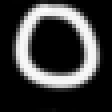
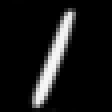
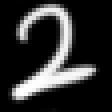
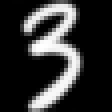
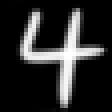
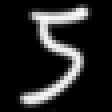
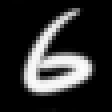
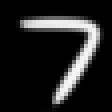
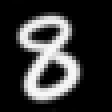
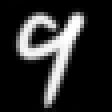

In [36]:
using Images, Plots
imgs = [Images.load("pic/mnist/$(pic_num).bmp") for pic_num in 0:9]

In [37]:
# process the images
img_formatted = map(imgs) do img
    img = img .|> rgb -> dot([rgb.r, rgb.g, rgb.b], [1 1 1]) / 3
    img = reshape(img', 28*28)
end

# start predicting
[
    (predict(img_formatted[idx]), idx-1) for idx in 1:length(img_formatted)
]

10-element Array{Tuple{Tuple{Float64,Int64},Int64},1}:
 ((0.6654823831791842, 0), 0) 
 ((0.993387612174138, 1), 1)  
 ((0.9858610899169266, 2), 2) 
 ((0.5785984109898659, 3), 3) 
 ((0.9983111879986811, 4), 4) 
 ((0.348110867541219, 3), 5)  
 ((0.996911224857671, 6), 6)  
 ((0.22664225039243271, 3), 7)
 ((0.613208233014896, 3), 8)  
 ((0.9830942506038293, 3), 9) 

This model just works well on some of these hand writting numbers, but provides completely wrong answers on others. The reason could be that samples in mnist are all well processed to be center and size adjusted, while these hand writting images are not. So our test accuracy could gets 94.8% but the model doesn't work well on these numbers above. This is one disadvantage of normal backpropagation NN, and CNN could get over it.